<a href="https://colab.research.google.com/github/SiddamreddyPavankumarReddy/Capstone-Project/blob/master/gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOLD PRICE PREDICTION

In [22]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #for evaluvation =error score,accuracy score

In [ ]:
df =pd.read_csv("/content/gld_price_data.csv")
df.head()
#df.shape
df.tail()
df.info()

In [11]:
#checking number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
#Analysis data 
#Correlation:1)Postive Correlation 2)Negative Correlation
#1)Positive Correlation:If one Price is increases another price increases
#2)Negative Correlation:If one price increase another decreases
correlation=df.corr()

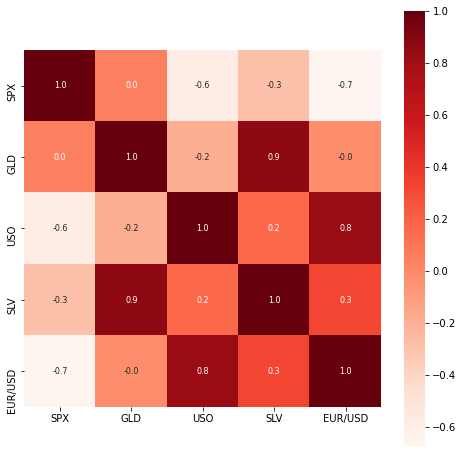

In [29]:
#Constructing Heat Map to Understand Correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Reds")


In [31]:
#Correlation Values of Gold
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


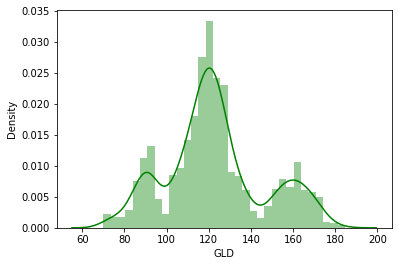

In [34]:
#Checking Distribution of GLD Price
sns.distplot(df["GLD"],color="green")

In [37]:
#Splitting the Feature and Target
X=df.drop(["Date","GLD"],axis=1)
Y=df["GLD"]

In [ ]:
print(X)

In [42]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [44]:
#Spliting into traing data & test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [48]:
#model training Random Forest
#Random Forest ensemble model(consits one or more models join together)
#Random Forest:It uses many decision trees to predict output by getting mean or median of decision tree 
reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evalution

In [ ]:
#Prediction on Test data
test_prediction=reg.predict(X_test)
print(test_prediction)

In [52]:
#R squared Error 
error_score=metrics.r2_score(Y_test,test_prediction)
print(error_score)

0.9849150338739013


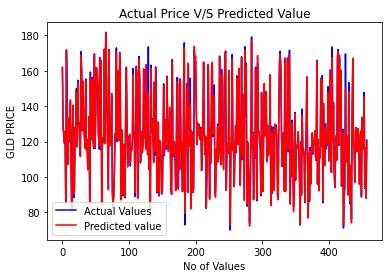

In [58]:
#Compare actual Values and Predicted Values in a plot
Y_test=list(Y_test)
plt.plot(Y_test,color="blue",label="Actual Values")
plt.plot(test_prediction,color="Red",label="Predicted value")
plt.title("Actual Price V/S Predicted Value")
plt.xlabel("No of Values")
plt.ylabel("GLD PRICE")
plt.legend()
plt.show()